In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

np.random.seed(42)

In [10]:
data = pd.read_csv(r"C:\Users\rahul\Desktop\projects\Mall_Customers.csv")

print("Dataset Shape:", data.shape)
print("\nFirst 5 rows of the dataset:\n", data.head())
print("\nDataset Info:\n")
data.info()
print("\nDescriptive Statistics:\n", data.describe())

# Selecting features for clustering (e.g., Annual Income and Spending Score)
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

Dataset Shape: (200, 5)

First 5 rows of the dataset:
    CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory 

In [11]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_scaled_df = pd.DataFrame(X_scaled, columns=['Annual Income (scaled)', 'Spending Score (scaled)'])
print("\nFirst 5 rows of scaled data:\n", X_scaled_df.head())


First 5 rows of scaled data:
    Annual Income (scaled)  Spending Score (scaled)
0               -1.738999                -0.434801
1               -1.738999                 1.195704
2               -1.700830                -1.715913
3               -1.700830                 1.040418
4               -1.662660                -0.395980


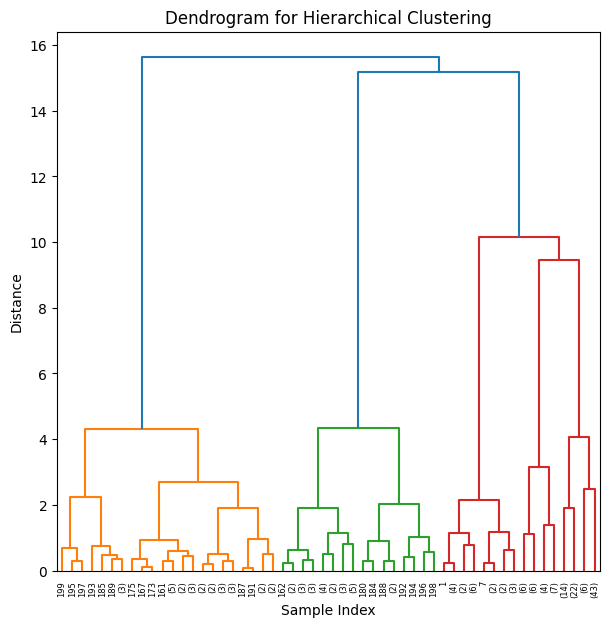

In [17]:
Z = linkage(X_scaled, method='ward')

#dendrogram
plt.figure(figsize=(7, 7))
dendrogram(Z, truncate_mode='level', p=5)  # Show up to 5 levels
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [13]:
n_clusters = 3  # Adjusted based on dendrogram or domain knowledge
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_labels = clustering.fit_predict(X_scaled)

data['Cluster'] = cluster_labels
print("\nFirst 5 rows with cluster labels:\n", data.head())


First 5 rows with cluster labels:
    CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        0  
1        0  
2        0  
3        0  
4        0  


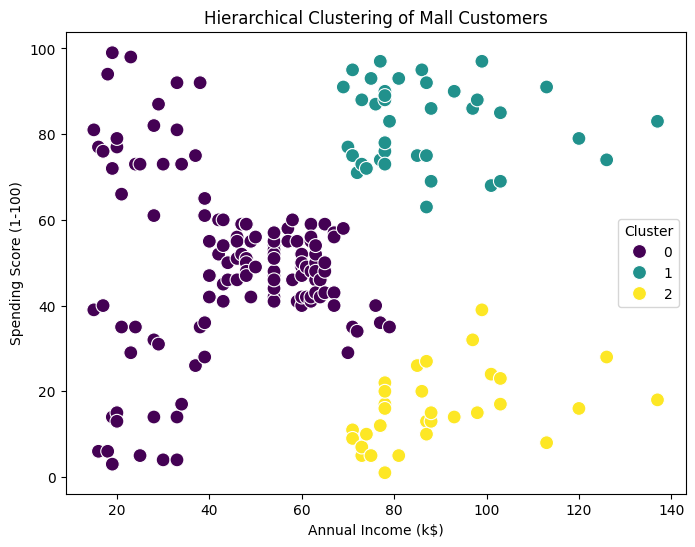

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=cluster_labels, palette='viridis', s=100)
plt.title('Hierarchical Clustering of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [15]:
# Calculating silhouette score
sil_score = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {sil_score:.3f}")

Silhouette Score: 0.461
